In [1]:
# Import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from typing import List, Tuple

%matplotlib inline

In [2]:
df = pd.read_csv("no_outlier_df.csv")

In [3]:
df.head()

,area,building_type,building_nature,image_url,num_bath_rooms,num_bed_rooms,price,property_description,property_overview,property_url,...,id,relaxation_amenity_count,security_amenity_count,maintenance_or_cleaning_amenity_count,social_amenity_count,expendable_amenity_count,service_staff_amenity_count,unclassify_amenity_count,division,zone
0,1100.0,Apartment,Residential,https://images-cdn.bproperty.com/thumbnails/80...,3.0,3.0,22000.0,1150 Square Feet Apartment For Rent In Mohamma...,The apartment of 1100 Square Feet is located ...,https://www.bproperty.com/en/property/details-...,...,bproperty-14087,0,2,2,0,5,0,4,Dhaka,Mohammadpur
1,1300.0,Apartment,Residential,https://images-cdn.bproperty.com/thumbnails/13...,3.0,3.0,40000.0,Grab This Lovely Flat For Rent In Bashundhara ...,This lovely apartment is located in a great lo...,https://www.bproperty.com/en/property/details-...,...,bproperty-14091,0,2,2,0,4,0,5,Dhaka,Bashundhara R/A
2,1500.0,Apartment,Residential,https://images-cdn.bproperty.com/thumbnails/15...,3.0,3.0,35000.0,1500 Square Feet Apartment With Necessary Resi...,"Make this beautiful 1,500 Sft apartment in Utt...",https://www.bproperty.com/en/property/details-...,...,bproperty-14092,0,1,3,2,2,0,4,Dhaka,Uttara
3,1350.0,Apartment,Residential,https://images-cdn.bproperty.com/thumbnails/15...,3.0,3.0,20000.0,Wow! This 1350 Sq Ft Apartment For Rent In Bas...,"In a very busy city like Dhaka, everyone tranc...",https://www.bproperty.com/en/property/details-...,...,bproperty-14093,0,0,0,0,4,0,3,Dhaka,Bashundhara R/A
4,1825.0,Apartment,Residential,https://images-cdn.bproperty.com/thumbnails/15...,4.0,3.0,60000.0,This 1825 Sq. Ft Apartment Will Ensure Your Go...,"In a very busy city like Dhaka, everyone tranc...",https://www.bproperty.com/en/property/details-...,...,bproperty-14094,0,2,1,0,3,0,4,Dhaka,Uttara


In [4]:
df.isnull().sum()

area                                         0
building_type                                0
building_nature                              0
image_url                                13514
num_bath_rooms                               0
num_bed_rooms                                0
price                                        0
property_description                     13256
property_overview                        13492
property_url                                19
purpose                                      0
city                                         0
locality                                     0
address                                   4680
id                                           0
relaxation_amenity_count                     0
security_amenity_count                       0
maintenance_or_cleaning_amenity_count        0
social_amenity_count                         0
expendable_amenity_count                     0
service_staff_amenity_count                  0
unclassify_am

In [5]:
df1 = df.drop(['property_url', 'image_url', 'address' ,'id', 'property_description', 'property_overview'], axis = 1)

In [6]:
df1.isnull().sum()

area                                      0
building_type                             0
building_nature                           0
num_bath_rooms                            0
num_bed_rooms                             0
price                                     0
purpose                                   0
city                                      0
locality                                  0
relaxation_amenity_count                  0
security_amenity_count                    0
maintenance_or_cleaning_amenity_count     0
social_amenity_count                      0
expendable_amenity_count                  0
service_staff_amenity_count               0
unclassify_amenity_count                  0
division                                  1
zone                                     80
dtype: int64

In [7]:
df["building_type"].unique()

array(['Apartment', 'Duplex', 'House', 'Residential Plot', 'Building',
       'Others', 'Commercial Plot', 'Shop', 'Office', 'Floor',
       'Warehouse', 'Factory'], dtype=object)

In [8]:
df["num_bed_rooms"].describe()

count    29813.000000
mean         2.312884
std          1.274504
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         10.000000
Name: num_bed_rooms, dtype: float64

In [9]:
df[(df["building_type"]=="Apartment") & (df["num_bed_rooms"]==0.0) & (df["building_nature"]=="Residential")]

,area,building_type,building_nature,image_url,num_bath_rooms,num_bed_rooms,price,property_description,property_overview,property_url,...,id,relaxation_amenity_count,security_amenity_count,maintenance_or_cleaning_amenity_count,social_amenity_count,expendable_amenity_count,service_staff_amenity_count,unclassify_amenity_count,division,zone
12015,3000.0,Apartment,Residential,NaN,1.0,0.0,10000.0,NaN,NaN,https://pbazaar.com//en/10-katha-plot-with-4-s...,...,pbazaar-16185,0,0,0,0,0,0,0,Chattogram,Chattogram City
22429,1365.0,Apartment,Residential,NaN,0.0,0.0,9700000.0,An 8 storied luxurious construction running re...,NaN,https://www.bdstall.com/details/serinity-1365-...,...,bdstall-30,0,0,0,0,0,0,0,Dhaka,Dhanmondi
22436,1430.0,Apartment,Residential,NaN,3.0,0.0,7000000.0,A ready flat of 1430 Sqft will be sold in Chit...,NaN,https://www.bdstall.com/details/chittagong-cha...,...,bdstall-54,0,0,0,0,0,0,0,Chattogram,Sub-district of Satkhira
23803,1245.0,Apartment,Residential,NaN,1.0,0.0,5602500.0,NaN,NaN,https://pbazaar.com//en/ready-1245sft-flat-a1-...,...,pbazaar-8286,0,0,0,0,0,0,0,Dhaka,Khilgaon


In [10]:
df2=df1.drop(df1[(df1["building_type"]=="Apartment") & (df1["num_bed_rooms"]==0.0) & (df1["building_nature"]=="Residential")].index)

In [11]:
df2.shape

(29809, 18)

In [12]:
#dropping the columns where the building_type is Apartment,building nature is apartment and the num_bed_rooms is 0
df2[(df2["building_type"]=="Apartment") & (df2["num_bath_rooms"]==0.0) & (df2["building_nature"]=="Residential")]

,area,building_type,building_nature,num_bath_rooms,num_bed_rooms,price,purpose,city,locality,relaxation_amenity_count,security_amenity_count,maintenance_or_cleaning_amenity_count,social_amenity_count,expendable_amenity_count,service_staff_amenity_count,unclassify_amenity_count,division,zone
70,2500.0,Apartment,Residential,0.0,4.0,70000.0,Rent,Dhaka,Baridhara,0,1,2,0,1,0,2,Dhaka,Gulshan
72,1500.0,Apartment,Residential,0.0,3.0,50000.0,Rent,Dhaka,Uttara,0,0,3,0,3,0,4,Dhaka,Uttara
73,1100.0,Apartment,Residential,0.0,3.0,14000.0,Rent,Dhaka,Khilkhet,0,0,0,0,2,0,4,Dhaka,Khilkhet
75,1100.0,Apartment,Residential,0.0,3.0,17000.0,Rent,Dhaka,Mirpur,0,0,2,0,3,0,3,Dhaka,Mirpur
76,1170.0,Apartment,Residential,0.0,3.0,24000.0,Rent,Dhaka,Malibagh,0,1,1,0,2,0,3,Dhaka,Ramna
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22416,970.0,Apartment,Residential,0.0,2.0,5200000.0,Sale,Dhaka,Khilgaon,0,1,2,0,2,0,3,Dhaka,Khilgaon
22417,1185.0,Apartment,Residential,0.0,3.0,6100000.0,Sale,Dhaka,Khilgaon,0,1,2,0,2,0,3,Dhaka,Khilgaon
22418,1160.0,Apartment,Residential,0.0,3.0,6200000.0,Sale,Dhaka,Khilgaon,0,1,2,0,2,0,3,Dhaka,Khilgaon
22430,1050.0,Apartment,Residential,0.0,3.0,5600000.0,Sale,Dhaka,Senpara Porbota,0,0,0,0,0,0,0,Dhaka,Mirpur


In [13]:
#dropping the columns where the building_type is Apartment,building nature is apartment and the num_bath_rooms is 0
#Dropping these since these might result in a error in training

df3=df2.drop(df2[(df2["building_type"]=="Apartment") & (df2["num_bath_rooms"]==0.0) & (df2["building_nature"]=="Residential")].index)

In [14]:
df3.shape

(23100, 18)

In [15]:
#Dropping the below columns since there are not enough values for these columns
df4=df3.drop(columns=["relaxation_amenity_count","social_amenity_count","service_staff_amenity_count"])

In [16]:
df4.head()

,area,building_type,building_nature,num_bath_rooms,num_bed_rooms,price,purpose,city,locality,security_amenity_count,maintenance_or_cleaning_amenity_count,expendable_amenity_count,unclassify_amenity_count,division,zone
0,1100.0,Apartment,Residential,3.0,3.0,22000.0,Rent,Dhaka,Mohammadpur,2,2,5,4,Dhaka,Mohammadpur
1,1300.0,Apartment,Residential,3.0,3.0,40000.0,Rent,Dhaka,Bashundhara R-A,2,2,4,5,Dhaka,Bashundhara R/A
2,1500.0,Apartment,Residential,3.0,3.0,35000.0,Rent,Dhaka,Uttara,1,3,2,4,Dhaka,Uttara
3,1350.0,Apartment,Residential,3.0,3.0,20000.0,Rent,Dhaka,Bashundhara R-A,0,0,4,3,Dhaka,Bashundhara R/A
4,1825.0,Apartment,Residential,4.0,3.0,60000.0,Rent,Dhaka,Uttara,2,1,3,4,Dhaka,Uttara


In [17]:
#Dropping Maintenance amenity as per the below analysis from the global report
#The don't made the properties price vary that much, either on sale or on rent. The mean prices as well as prices range are nearly the same. We could explain that by the fact that we expecting to find maintenance or cleaning amenities for each property.
df5=df4.drop(columns=["maintenance_or_cleaning_amenity_count"])

In [18]:
df5.head()

,area,building_type,building_nature,num_bath_rooms,num_bed_rooms,price,purpose,city,locality,security_amenity_count,expendable_amenity_count,unclassify_amenity_count,division,zone
0,1100.0,Apartment,Residential,3.0,3.0,22000.0,Rent,Dhaka,Mohammadpur,2,5,4,Dhaka,Mohammadpur
1,1300.0,Apartment,Residential,3.0,3.0,40000.0,Rent,Dhaka,Bashundhara R-A,2,4,5,Dhaka,Bashundhara R/A
2,1500.0,Apartment,Residential,3.0,3.0,35000.0,Rent,Dhaka,Uttara,1,2,4,Dhaka,Uttara
3,1350.0,Apartment,Residential,3.0,3.0,20000.0,Rent,Dhaka,Bashundhara R-A,0,4,3,Dhaka,Bashundhara R/A
4,1825.0,Apartment,Residential,4.0,3.0,60000.0,Rent,Dhaka,Uttara,2,3,4,Dhaka,Uttara


In [19]:
df5[df5.area==0]

,area,building_type,building_nature,num_bath_rooms,num_bed_rooms,price,purpose,city,locality,security_amenity_count,expendable_amenity_count,unclassify_amenity_count,division,zone


In [20]:
df5[df5.price==0]

,area,building_type,building_nature,num_bath_rooms,num_bed_rooms,price,purpose,city,locality,security_amenity_count,expendable_amenity_count,unclassify_amenity_count,division,zone


In [21]:
df5[df5.area/df5.num_bed_rooms<200]

,area,building_type,building_nature,num_bath_rooms,num_bed_rooms,price,purpose,city,locality,security_amenity_count,expendable_amenity_count,unclassify_amenity_count,division,zone
4954,410.0,Apartment,Residential,3.0,3.0,28000.0,Rent,Dhaka,Bashundhara RA,0,0,0,Dhaka,Bashundhara R/A
7948,390.0,Apartment,Residential,4.0,3.0,33000.0,Rent,Dhaka,DOHS Mirpur,0,0,0,Dhaka,Mirpur
8255,500.0,Apartment,Residential,3.0,3.0,16000.0,Rent,Dhaka,Mirpur,0,0,0,Dhaka,Mirpur
9718,350.0,Apartment,Residential,1.0,2.0,16000.0,Rent,Dhaka,Tejgaon,0,0,0,Dhaka,Tejgaon
10429,500.0,Apartment,Residential,3.0,3.0,18000.0,Rent,Dhaka,DOHS Baridhara,0,0,0,Dhaka,Gulshan
10933,400.0,Apartment,Residential,2.0,3.0,9000.0,Rent,Sylhet,Sylhet City,0,0,0,Sylhet,Sylhet City
11008,400.0,Apartment,Residential,1.0,3.0,20000.0,Rent,Dhaka,Rampura,0,0,0,Dhaka,Khilgaon
11516,500.0,Apartment,Residential,2.0,3.0,11000.0,Rent,Dhaka,Mirpur,0,0,0,Dhaka,Mirpur
12222,750.0,Apartment,Residential,2.0,4.0,13000.0,Rent,Dhaka,Rampura,0,0,0,Dhaka,Khilgaon
12286,350.0,Apartment,Residential,2.0,2.0,10000.0,Rent,Narayanganj,Narayanganj,0,0,0,Dhaka,Sub-district of Narayanganj


In [22]:
#removing the values from the dataframe where the sqft length per bedrooms are less than 300sgft.
#Taking 300 since the typical bedroom size is atleast 300 for most of the properties
df6=df5[~(df5.area/df5.num_bed_rooms<200)]

In [23]:
df6.shape

(23065, 14)

In [24]:
#removing the columns city and locality using zone and division for further analysis since both of them put together is a better estimator than city and locality since there are a lot of outliers in them
df6=df6.drop(columns=["locality","city"])

In [25]:
df6.head()

,area,building_type,building_nature,num_bath_rooms,num_bed_rooms,price,purpose,security_amenity_count,expendable_amenity_count,unclassify_amenity_count,division,zone
0,1100.0,Apartment,Residential,3.0,3.0,22000.0,Rent,2,5,4,Dhaka,Mohammadpur
1,1300.0,Apartment,Residential,3.0,3.0,40000.0,Rent,2,4,5,Dhaka,Bashundhara R/A
2,1500.0,Apartment,Residential,3.0,3.0,35000.0,Rent,1,2,4,Dhaka,Uttara
3,1350.0,Apartment,Residential,3.0,3.0,20000.0,Rent,0,4,3,Dhaka,Bashundhara R/A
4,1825.0,Apartment,Residential,4.0,3.0,60000.0,Rent,2,3,4,Dhaka,Uttara


In [26]:
df6.shape

(23065, 12)

In [27]:
df6.isnull().sum()

area                         0
building_type                0
building_nature              0
num_bath_rooms               0
num_bed_rooms                0
price                        0
purpose                      0
security_amenity_count       0
expendable_amenity_count     0
unclassify_amenity_count     0
division                     1
zone                        74
dtype: int64

In [28]:
df6.zone.unique()

array(['Mohammadpur', 'Bashundhara R/A', 'Uttara', 'Mirpur', 'Gulshan',
       'Chattogram City', 'Hazaribagh', 'Sub-district of Chattogram',
       'Dhanmondi', 'Hatirpool', 'Dhaka Cantonment', 'Khilgaon', 'Ramna',
       'Banani', 'Shyamoli', 'Badda', 'Mohakhali', 'Sher-E-Bangla Nagar',
       'Old Dhaka', 'Dakshin Khan', 'Tejgaon', 'Khilkhet', 'Sutrapur',
       'New Market', 'Turag', 'Motijheel', 'Sylhet City',
       'Sub-district of Rangpur', 'Sub-district of Khulna', 'Kurmitola',
       'Sub-district of Rajshahi', nan, 'Shabujbag',
       'Sub-district of Dinajpur', 'Jatrabari', 'Sub-district of Gazipur',
       'Mugdapara', 'Keraniganj', 'Sub-district of Cumilla',
       'Sub-district of Mymensingh', 'Savar', 'Sub-district of Jessore',
       'Demra', 'Sub-district of Naogaon', 'Sub-district of Narayanganj',
       'Sub-district of Barishal', 'Sub-district of Bogura',
       'Sub-district of Madaripur', 'Sub-district of Brahmanbaria',
       'Sub-district of Narsingdi', 'Sub-di

In [29]:
df7=df6.dropna(subset=["zone","division"])

In [30]:
df7.isnull().sum()

area                        0
building_type               0
building_nature             0
num_bath_rooms              0
num_bed_rooms               0
price                       0
purpose                     0
security_amenity_count      0
expendable_amenity_count    0
unclassify_amenity_count    0
division                    0
zone                        0
dtype: int64

In [31]:
zone_count=df7.groupby("zone")["zone"].agg('count')

In [32]:
zone_count[zone_count<10]

zone
Golapbag                        2
Kurmitola                       7
Sub-district of Bandarban       1
Sub-district of Barguna         2
Sub-district of Bogura          3
Sub-district of Brahmanbaria    2
Sub-district of Chandpur        3
Sub-district of Cumilla         4
Sub-district of Faridpur        1
Sub-district of Feni            1
Sub-district of Gaibandha       1
Sub-district of Habiganj        1
Sub-district of Jamalpur        1
Sub-district of Jessore         3
Sub-district of Kishoreganj     1
Sub-district of Kushtia         1
Sub-district of Madaripur       2
Sub-district of Magura          2
Sub-district of Manikganj       3
Sub-district of Mymensingh      7
Sub-district of Naogaon         1
Sub-district of Narsingdi       4
Sub-district of Noakhali        1
Sub-district of Shariatpur      1
Sub-district of Sherpur         1
Sub-district of Sirajganj       2
Sub-district of Thakurgaon      4
Name: zone, dtype: int64

In [33]:
zone_less_than_10 = zone_count[zone_count<10]

In [34]:
df7.groupby("division")["division"].agg('count')

division
Barisal         215
Chattogram     1918
Dhaka         20626
Khulna           36
Mymensingh        9
Rajshahi         42
Rangpur          95
Sylhet           49
Name: division, dtype: int64

In [35]:
df7[df7.division=="Mymensingh"]

,area,building_type,building_nature,num_bath_rooms,num_bed_rooms,price,purpose,security_amenity_count,expendable_amenity_count,unclassify_amenity_count,division,zone
7349,1100.0,Apartment,Residential,2.0,2.0,5500.0,Rent,0,0,0,Mymensingh,Sub-district of Mymensingh
9129,400.0,Apartment,Residential,1.0,2.0,6000.0,Rent,0,0,0,Mymensingh,Sub-district of Mymensingh
10905,600.0,Apartment,Residential,2.0,2.0,7500.0,Rent,0,0,0,Mymensingh,Sub-district of Mymensingh
11887,650.0,Apartment,Residential,2.0,2.0,7000.0,Rent,0,0,0,Mymensingh,Sub-district of Mymensingh
12295,750.0,Apartment,Residential,2.0,2.0,10000.0,Rent,0,0,0,Mymensingh,Sub-district of Mymensingh
23898,900.0,Apartment,Residential,2.0,3.0,2430000.0,Sale,0,0,0,Mymensingh,Sub-district of Sherpur
24475,8500.0,Building,Commercial,0.0,0.0,297500.0,Rent,0,0,0,Mymensingh,Sub-district of Mymensingh
24895,2000.0,Building,Commercial,0.0,0.0,20000.0,Rent,0,0,0,Mymensingh,Sub-district of Jamalpur
25196,440.0,Building,Commercial,0.0,0.0,70000.0,Rent,0,0,0,Mymensingh,Sub-district of Mymensingh


In [36]:
#Changing the zones with less than 10 properties to other
df8=df7
df8.zone = df8.zone.apply(lambda x: 'other' if x in zone_less_than_10 else x) 

C:\Users\Ragave Manokaran\AppData\Local\Temp\ipykernel_24024\4124184098.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8.zone = df8.zone.apply(lambda x: 'other' if x in zone_less_than_10 else x)


In [37]:
df8.shape

(22990, 12)

In [38]:
df8.zone.unique()

array(['Mohammadpur', 'Bashundhara R/A', 'Uttara', 'Mirpur', 'Gulshan',
       'Chattogram City', 'Hazaribagh', 'Sub-district of Chattogram',
       'Dhanmondi', 'Hatirpool', 'Dhaka Cantonment', 'Khilgaon', 'Ramna',
       'Banani', 'Shyamoli', 'Badda', 'Mohakhali', 'Sher-E-Bangla Nagar',
       'Old Dhaka', 'Dakshin Khan', 'Tejgaon', 'Khilkhet', 'Sutrapur',
       'New Market', 'Turag', 'Motijheel', 'Sylhet City',
       'Sub-district of Rangpur', 'Sub-district of Khulna', 'other',
       'Sub-district of Rajshahi', 'Shabujbag',
       'Sub-district of Dinajpur', 'Jatrabari', 'Sub-district of Gazipur',
       'Mugdapara', 'Keraniganj', 'Savar', 'Demra',
       'Sub-district of Narayanganj', 'Sub-district of Barishal',
       'Purbachal', 'Sub-district of Dhaka'], dtype=object)

In [39]:
df8[df8.zone=='other']

,area,building_type,building_nature,num_bath_rooms,num_bed_rooms,price,purpose,security_amenity_count,expendable_amenity_count,unclassify_amenity_count,division,zone
3638,1200.0,Apartment,Residential,2.0,3.0,30000.0,Rent,0,0,0,Dhaka,other
3678,1650.0,Apartment,Residential,3.0,3.0,42000.0,Rent,0,0,0,Dhaka,other
7141,750.0,Apartment,Residential,1.0,3.0,12000.0,Rent,0,0,0,Chattogram,other
7349,1100.0,Apartment,Residential,2.0,2.0,5500.0,Rent,0,0,0,Mymensingh,other
7703,1650.0,Apartment,Residential,3.0,4.0,25000.0,Rent,0,0,0,Dhaka,other
...,...,...,...,...,...,...,...,...,...,...,...,...
25087,3500.0,Building,Commercial,0.0,0.0,52500.0,Rent,0,0,0,Khulna,other
25196,440.0,Building,Commercial,0.0,0.0,70000.0,Rent,0,0,0,Mymensingh,other
25226,2100.0,Building,Commercial,0.0,0.0,44100.0,Rent,0,0,0,Chattogram,other
28983,1200.0,Shop,Commercial,0.0,0.0,70000.0,Rent,0,0,0,Khulna,other


In [40]:
df8.shape

(22990, 12)

In [41]:
#dropping all the zones with less than 10 properties. 
#dropping just the zones will also drop the divisions with less than 10 properties so we are not dropping them seperately
df9=df8[~(df8.zone=='other')]

In [42]:
df9.shape

(22928, 12)

In [43]:
df9.groupby("division")["division"].agg('count')

division
Barisal         213
Chattogram     1905
Dhaka         20605
Khulna           30
Rajshahi         37
Rangpur          90
Sylhet           48
Name: division, dtype: int64

In [44]:
df9.groupby("zone")["zone"].agg('count')

zone
Badda                           799
Banani                          763
Bashundhara R/A                1682
Chattogram City                1740
Dakshin Khan                    271
Demra                            23
Dhaka Cantonment                130
Dhanmondi                       746
Gulshan                        2050
Hatirpool                       243
Hazaribagh                       50
Jatrabari                        30
Keraniganj                       54
Khilgaon                       1895
Khilkhet                        450
Mirpur                         4029
Mohakhali                       738
Mohammadpur                    1833
Motijheel                       502
Mugdapara                        11
New Market                       76
Old Dhaka                       129
Purbachal                        21
Ramna                           356
Savar                           215
Shabujbag                        14
Sher-E-Bangla Nagar              89
Shyamoli               

In [45]:
#removing the price per sqft outliers based on zone as the property prices are classified based on zone 
#This will remove the rows that are outside the average range of the price classified based on zone
new_df=pd.DataFrame()
for keys,subdf in df9.groupby("zone"):
    m=np.mean(subdf.price)
    st=np.std(subdf.price)
    reduced_df=subdf[(subdf.price>(m-2*st))&(subdf.price<=(m+2*st))]
    new_df=pd.concat([new_df,reduced_df],ignore_index=True)

new_df.head()

,area,building_type,building_nature,num_bath_rooms,num_bed_rooms,price,purpose,security_amenity_count,expendable_amenity_count,unclassify_amenity_count,division,zone
0,1370.0,Apartment,Residential,3.0,3.0,35000.0,Rent,2,3,5,Dhaka,Badda
1,1180.0,Apartment,Residential,2.0,3.0,23000.0,Rent,0,0,4,Dhaka,Badda
2,1350.0,Apartment,Residential,3.0,3.0,25000.0,Rent,0,4,4,Dhaka,Badda
3,1665.0,Apartment,Residential,3.0,3.0,45000.0,Rent,0,0,0,Dhaka,Badda
4,1150.0,Apartment,Residential,3.0,3.0,22000.0,Rent,0,4,3,Dhaka,Badda


In [46]:
new_df.shape

(22225, 12)

In [47]:
cols = new_df.columns
num_cols = new_df._get_numeric_data().columns
list(set(cols) - set(num_cols))


['division', 'building_type', 'purpose', 'building_nature', 'zone']

In [48]:
categorical_cols= list(set(cols) - set(num_cols))
categorical_cols

['division', 'building_type', 'purpose', 'building_nature', 'zone']

In [49]:
new_df.head()

,area,building_type,building_nature,num_bath_rooms,num_bed_rooms,price,purpose,security_amenity_count,expendable_amenity_count,unclassify_amenity_count,division,zone
0,1370.0,Apartment,Residential,3.0,3.0,35000.0,Rent,2,3,5,Dhaka,Badda
1,1180.0,Apartment,Residential,2.0,3.0,23000.0,Rent,0,0,4,Dhaka,Badda
2,1350.0,Apartment,Residential,3.0,3.0,25000.0,Rent,0,4,4,Dhaka,Badda
3,1665.0,Apartment,Residential,3.0,3.0,45000.0,Rent,0,0,0,Dhaka,Badda
4,1150.0,Apartment,Residential,3.0,3.0,22000.0,Rent,0,4,3,Dhaka,Badda


In [50]:
new_df.groupby("building_type")["building_type"].agg('count')

building_type
Apartment           16909
Building             1153
Commercial Plot        25
Duplex                 32
Factory                16
Floor                 699
House                  45
Office               2033
Others                  6
Residential Plot      573
Shop                  708
Warehouse              26
Name: building_type, dtype: int64

In [51]:
#dropping all the buiding types with less than 10 properties. 
df10=new_df[~(new_df.building_type=='Others')]

In [52]:
df10.shape

(22219, 12)

In [53]:
dummies= pd.get_dummies(categorical_cols)

In [54]:
dummies

,building_nature,building_type,division,purpose,zone
0,False,False,True,False,False
1,False,True,False,False,False
2,False,False,False,True,False
3,True,False,False,False,False
4,False,False,False,False,True


In [55]:
dummies= pd.get_dummies(data=df10, columns=categorical_cols)
dummies

,area,num_bath_rooms,num_bed_rooms,price,security_amenity_count,expendable_amenity_count,unclassify_amenity_count,division_Barisal,division_Chattogram,division_Dhaka,...,zone_Sub-district of Gazipur,zone_Sub-district of Khulna,zone_Sub-district of Narayanganj,zone_Sub-district of Rajshahi,zone_Sub-district of Rangpur,zone_Sutrapur,zone_Sylhet City,zone_Tejgaon,zone_Turag,zone_Uttara
0,1370.0,3.0,3.0,35000.0,2,3,5,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,1180.0,2.0,3.0,23000.0,0,0,4,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,1350.0,3.0,3.0,25000.0,0,4,4,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,1665.0,3.0,3.0,45000.0,0,0,0,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,1150.0,3.0,3.0,22000.0,0,4,3,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22220,2300.0,4.0,3.0,161000.0,0,0,0,False,False,True,...,False,False,False,False,False,False,False,False,False,True
22221,2000.0,3.0,3.0,70000.0,0,0,0,False,False,True,...,False,False,False,False,False,False,False,False,False,True
22222,880.0,0.0,0.0,30000.0,1,0,0,False,False,True,...,False,False,False,False,False,False,False,False,False,True
22223,2200.0,0.0,0.0,176000.0,1,0,0,False,False,True,...,False,False,False,False,False,False,False,False,False,True


In [56]:
dummies.columns

Index(['area', 'num_bath_rooms', 'num_bed_rooms', 'price',
       'security_amenity_count', 'expendable_amenity_count',
       'unclassify_amenity_count', 'division_Barisal', 'division_Chattogram',
       'division_Dhaka', 'division_Khulna', 'division_Rajshahi',
       'division_Rangpur', 'division_Sylhet', 'building_type_Apartment',
       'building_type_Building', 'building_type_Commercial Plot',
       'building_type_Duplex', 'building_type_Factory', 'building_type_Floor',
       'building_type_House', 'building_type_Office',
       'building_type_Residential Plot', 'building_type_Shop',
       'building_type_Warehouse', 'purpose_Rent', 'purpose_Sale',
       'building_nature_Commercial', 'building_nature_Residential',
       'zone_Badda', 'zone_Banani', 'zone_Bashundhara R/A',
       'zone_Chattogram City', 'zone_Dakshin Khan', 'zone_Demra',
       'zone_Dhaka Cantonment', 'zone_Dhanmondi', 'zone_Gulshan',
       'zone_Hatirpool', 'zone_Hazaribagh', 'zone_Jatrabari',
       'zone_K

In [57]:
#To avoid dummy variable trap dropping one column in each categorical type
df11=dummies.drop(columns=['building_type_Factory','zone_Shabujbag','division_Khulna','building_nature_Commercial','purpose_Sale'])

In [58]:
df11.head()

,area,num_bath_rooms,num_bed_rooms,price,security_amenity_count,expendable_amenity_count,unclassify_amenity_count,division_Barisal,division_Chattogram,division_Dhaka,...,zone_Sub-district of Gazipur,zone_Sub-district of Khulna,zone_Sub-district of Narayanganj,zone_Sub-district of Rajshahi,zone_Sub-district of Rangpur,zone_Sutrapur,zone_Sylhet City,zone_Tejgaon,zone_Turag,zone_Uttara
0,1370.0,3.0,3.0,35000.0,2,3,5,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,1180.0,2.0,3.0,23000.0,0,0,4,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,1350.0,3.0,3.0,25000.0,0,4,4,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,1665.0,3.0,3.0,45000.0,0,0,0,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,1150.0,3.0,3.0,22000.0,0,4,3,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [59]:
df11.shape

(22219, 66)

In [60]:
X = df11.drop(columns='price')
X

,area,num_bath_rooms,num_bed_rooms,security_amenity_count,expendable_amenity_count,unclassify_amenity_count,division_Barisal,division_Chattogram,division_Dhaka,division_Rajshahi,...,zone_Sub-district of Gazipur,zone_Sub-district of Khulna,zone_Sub-district of Narayanganj,zone_Sub-district of Rajshahi,zone_Sub-district of Rangpur,zone_Sutrapur,zone_Sylhet City,zone_Tejgaon,zone_Turag,zone_Uttara
0,1370.0,3.0,3.0,2,3,5,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,1180.0,2.0,3.0,0,0,4,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,1350.0,3.0,3.0,0,4,4,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,1665.0,3.0,3.0,0,0,0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,1150.0,3.0,3.0,0,4,3,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22220,2300.0,4.0,3.0,0,0,0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
22221,2000.0,3.0,3.0,0,0,0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
22222,880.0,0.0,0.0,1,0,0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
22223,2200.0,0.0,0.0,1,0,0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True


In [61]:
y = df11['price']
y

0         35000.0
1         23000.0
2         25000.0
3         45000.0
4         22000.0
           ...   
22220    161000.0
22221     70000.0
22222     30000.0
22223    176000.0
22224    260000.0
Name: price, Length: 22219, dtype: float64

In [62]:
import sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [63]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.8005837791163369

In [64]:
# Libraries to split data, impute missing values, and scale values
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Libraries to import decision tree classifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import StackingClassifier

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score

from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

import xgboost as xgb
from sklearn.linear_model import Ridge
#from yellowbrick.regressor import PredictionError, ResidualsPlot
import lightgbm as lgb

In [65]:
#the natural logarithm transformation to the target variable y using the np.log1p() function. This transformation is commonly used when dealing with skewed data or when trying to normalize the target variable.
log_transformed_y = np.log1p(y)
log_transformed_y_train = np.log1p(y_train)
log_transformed_y_test = np.log1p(y_test)

In [66]:
# Apply StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [67]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(scaled_X_train,log_transformed_y_train)
lr.score(scaled_X_test,log_transformed_y_test)

0.9683218132434799

In [68]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), scaled_X, log_transformed_y, cv=cv)

array([0.96906356, 0.96816763, 0.96566705, 0.96975622, 0.96982675])

In [69]:
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept':[True,False],
                'copy_X':[True,False],
                'positive':[True,False],
                'n_jobs':[1,10,None]
                
                #'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [0.001,0.01,0.1,1,10],
                'selection': ['random', 'cyclic'],
                'fit_intercept': [True,False],
            }
        },
        'ridge': {
            'model': Ridge(),
            'params': {
                'alpha': [0.1,1,10,30,50,70,100],
                #'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['squared_error','friedman_mse','absolute_error','poisson'],
                'splitter': ['best','random']
            }
        },
        'xgboost': {
            'model': xgb.XGBRegressor(),
            'params': {
                    'learning_rate': [0.1, 0.01],
                    'max_depth': [None],
                    'n_estimators': [10, 20, 50],
                    'subsample': [0.8, 0.9]
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [10, 20, 50],
                'max_depth': [None],
                'min_samples_split': [2, 5, 10]
            }
        },
        'light_gradient_boosting': {
            'model': lgb.LGBMRegressor(),
            'params': {
                'learning_rate': [0.1, 0.01, 0.001],
                'max_depth': [3, 5, 7],
                'num_leaves': [31, 63, 127]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(scaled_X,log_transformed_y)

C:\Users\Ragave Manokaran\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.384e+04, tolerance: 2.750e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ragave Manokaran\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.045e+03, tolerance: 2.757e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ragave Manokaran\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the numbe

,model,best_score,best_params
0,linear_regression,0.968496,"{'copy_X': True, 'fit_intercept': True, 'n_job..."
1,lasso,0.968552,"{'alpha': 0.001, 'fit_intercept': True, 'selec..."
2,ridge,0.968522,{'alpha': 30}
3,decision_tree,0.974687,"{'criterion': 'squared_error', 'splitter': 'ra..."
4,xgboost,0.979967,"{'learning_rate': 0.1, 'max_depth': None, 'n_e..."
5,random_forest,0.982087,"{'max_depth': None, 'min_samples_split': 10, '..."
6,light_gradient_boosting,0.981994,"{'learning_rate': 0.1, 'max_depth': 7, 'num_le..."


In [72]:
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept':[True,False],
                'copy_X':[True,False],
                'positive':[True,False],
                'n_jobs':[1,10,None]
                
                #'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [0.001,0.01,0.1,1,10],
                'selection': ['random', 'cyclic'],
                'fit_intercept': [True,False],
            }
        },
        'ridge': {
            'model': Ridge(),
            'params': {
                'alpha': [0.1,1,10,30,50,70,100],
                #'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['squared_error','friedman_mse','absolute_error','poisson'],
                'splitter': ['best','random']
            }
        },
        'xgboost': {
            'model': xgb.XGBRegressor(),
            'params': {
                    'learning_rate': [0.1, 0.01],
                    'max_depth': [None],
                    'n_estimators': [10, 20, 50],
                    'subsample': [0.8, 0.9]
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [10, 20, 50],
                'max_depth': [None],
                'min_samples_split': [2, 5, 10]
            }
        },
        'light_gradient_boosting': {
            'model': lgb.LGBMRegressor(),
            'params': {
                'learning_rate': [0.1, 0.01, 0.001],
                'max_depth': [3, 5, 7],
                'num_leaves': [31, 63, 127]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        rs =  RandomizedSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        rs.fit(scaled_X,log_transformed_y)
        scores.append({
            'model': algo_name,
            'best_score': rs.best_score_,
            'best_params': rs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(scaled_X,log_transformed_y)

C:\Users\Ragave Manokaran\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.059e+04, tolerance: 2.750e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ragave Manokaran\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.021e+03, tolerance: 2.752e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ragave Manokaran\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the numbe

,model,best_score,best_params
0,linear_regression,0.968070,"{'positive': False, 'n_jobs': None, 'fit_inter..."
1,lasso,0.968552,"{'selection': 'cyclic', 'fit_intercept': True,..."
2,ridge,0.968522,{'alpha': 30}
3,decision_tree,0.974448,"{'splitter': 'random', 'criterion': 'friedman_..."
4,xgboost,0.979967,"{'subsample': 0.9, 'n_estimators': 50, 'max_de..."
5,random_forest,0.982119,"{'n_estimators': 50, 'min_samples_split': 10, ..."
6,light_gradient_boosting,0.981973,"{'num_leaves': 127, 'max_depth': 7, 'learning_..."


In [73]:
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [125,126,127,128,129,130,131,132,133,134,135],
                'max_depth': [25,26,27,28,29,30,31,32,33,34,35],
                'min_samples_split': [10,11,12,13,14,15,16,17,18,19,20]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        rs =  RandomizedSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        rs.fit(scaled_X,log_transformed_y)
        scores.append({
            'model': algo_name,
            'best_score': rs.best_score_,
            'best_params': rs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

best_model_params=find_best_model_using_gridsearchcv(scaled_X,log_transformed_y)

In [74]:
best_model_params

,model,best_score,best_params
0,random_forest,0.982304,"{'n_estimators': 125, 'min_samples_split': 11,..."


In [75]:
print(best_model_params["best_params"][0]["min_samples_split"])

11


In [76]:
print(best_model_params["best_params"][0]["max_depth"])

29


In [77]:
print(best_model_params["best_params"][0]["n_estimators"])

125


In [78]:
rfr= RandomForestRegressor(n_estimators=128 ,max_depth=30 ,min_samples_split=14)
rfr.fit(scaled_X_train,log_transformed_y_train)
rfr.score(scaled_X_test,log_transformed_y_test)

0.982900605007356

In [79]:
predictions=rfr.predict(scaled_X_test)
diff= predictions-log_transformed_y_test
diff

18030    0.285157
12505    0.009787
13183   -0.073451
19702   -0.179035
3123     0.199281
           ...   
18632    0.272576
21520   -0.160732
10196    0.144335
13585   -0.205050
7027    -0.321154
Name: price, Length: 4444, dtype: float64

C:\Users\Ragave Manokaran\AppData\Local\Temp\ipykernel_24024\1670086357.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diff)


<Axes: xlabel='price', ylabel='Density'>

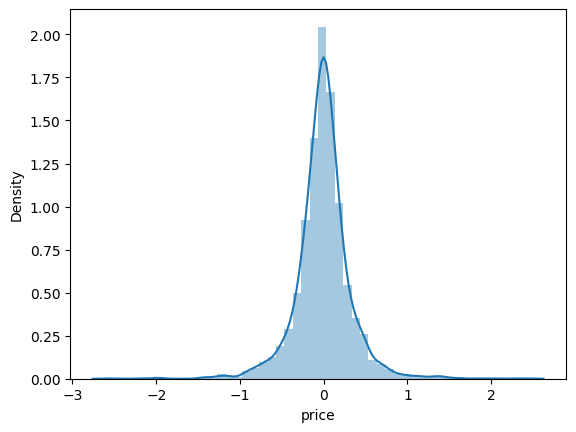

In [80]:
import seaborn as sns
sns.distplot(diff)

In [81]:
# import pickle
# pickle.dump(rfr, open('./model.sav', 'wb'))

In [82]:
import bz2
import pickle
import _pickle as cPickle

In [83]:
# Saves the "data" with the "title" and adds the .pickle
def full_pickle(title, data):
 pikd = open(title + '.pickle', 'wb')
 pickle.dump(data, pikd)
 pikd.close()

full_pickle('final_model', rfr) 

In [84]:
# loads and returns a pickled objects
def loosen(file):
 pikd = open(file, 'rb')
 data = pickle.load(pikd)
 pikd.close()
 return data

loaded_model = loosen('final_model.pickle') 

In [85]:
# Pickle a file and then compress it into a file with extension for random forest regression model
def compressed_pickle(title, data):
 with bz2.BZ2File(title + '.pbz2', 'w') as f: 
     cPickle.dump(data, f)

compressed_pickle('compressed_model', rfr) 

In [86]:
# Load compressed pickle file for random forest regression model
def decompress_pickle(file):
 data = bz2.BZ2File(file, 'rb')
 data = cPickle.load(data)
 return data

compressed_model = decompress_pickle('compressed_model.pbz2') 

In [87]:
# Pickle a file and then compress it into a file with extension for scaler model
def compressed_pickle(title, data):
 with bz2.BZ2File(title + '.pbz2', 'w') as f: 
     cPickle.dump(data, f)

compressed_pickle('compressed_scaler_model', scaler)

In [88]:
# Load compressed pickle file for scaler model
def decompress_pickle(file):
 data = bz2.BZ2File(file, 'rb')
 data = cPickle.load(data)
 return data

compressed_scaler_model = decompress_pickle('compressed_scaler_model.pbz2')

In [89]:
compressed_model

RandomForestRegressor(max_depth=30, min_samples_split=14, n_estimators=128)

In [90]:
compressed_scaler_model

StandardScaler()

In [91]:
X.columns

Index(['area', 'num_bath_rooms', 'num_bed_rooms', 'security_amenity_count',
       'expendable_amenity_count', 'unclassify_amenity_count',
       'division_Barisal', 'division_Chattogram', 'division_Dhaka',
       'division_Rajshahi', 'division_Rangpur', 'division_Sylhet',
       'building_type_Apartment', 'building_type_Building',
       'building_type_Commercial Plot', 'building_type_Duplex',
       'building_type_Floor', 'building_type_House', 'building_type_Office',
       'building_type_Residential Plot', 'building_type_Shop',
       'building_type_Warehouse', 'purpose_Rent',
       'building_nature_Residential', 'zone_Badda', 'zone_Banani',
       'zone_Bashundhara R/A', 'zone_Chattogram City', 'zone_Dakshin Khan',
       'zone_Demra', 'zone_Dhaka Cantonment', 'zone_Dhanmondi', 'zone_Gulshan',
       'zone_Hatirpool', 'zone_Hazaribagh', 'zone_Jatrabari',
       'zone_Keraniganj', 'zone_Khilgaon', 'zone_Khilkhet', 'zone_Mirpur',
       'zone_Mohakhali', 'zone_Mohammadpur', 'zone_M

In [92]:
rfr_notscaled= RandomForestRegressor(n_estimators=128 ,max_depth=32 ,min_samples_split=14)
rfr_notscaled.fit(X_train,y_train)
rfr_notscaled.score(X_test,y_test)

0.9503241742053019

In [93]:
#To avoid dummy variable trap dropped one column in each categorical type so if all the values are zero then it is this column
#building_type_Factory
#zone_Shabujbag
#division_Khulna
#building_nature_Commercial
#purpose_Sale

In [114]:
 def make_X(area ,num_bath_rooms ,num_bed_rooms, security_amenity_count, expendable_amenity_count, unclassify_amenity_count, building_type, zone, division, purpose, building_nature):
    building_type_columns=['building_type_Apartment', 'building_type_Building',
           'building_type_Commercial Plot', 'building_type_Duplex',
           'building_type_Floor', 'building_type_House', 'building_type_Office',
           'building_type_Residential Plot', 'building_type_Shop',
           'building_type_Warehouse']
    zone_columns=['zone_Badda',
           'zone_Banani', 'zone_Bashundhara R/A', 'zone_Chattogram City',
           'zone_Dakshin Khan', 'zone_Demra', 'zone_Dhaka Cantonment',
           'zone_Dhanmondi', 'zone_Gulshan', 'zone_Hatirpool', 'zone_Hazaribagh',
           'zone_Jatrabari', 'zone_Keraniganj', 'zone_Khilgaon', 'zone_Khilkhet',
           'zone_Mirpur', 'zone_Mohakhali', 'zone_Mohammadpur', 'zone_Motijheel',
           'zone_Mugdapara', 'zone_New Market', 'zone_Old Dhaka', 'zone_Purbachal',
           'zone_Ramna', 'zone_Savar', 'zone_Sher-E-Bangla Nagar', 'zone_Shyamoli',
           'zone_Sub-district of Barishal', 'zone_Sub-district of Chattogram',
           'zone_Sub-district of Dhaka', 'zone_Sub-district of Dinajpur',
           'zone_Sub-district of Gazipur', 'zone_Sub-district of Khulna',
           'zone_Sub-district of Narayanganj', 'zone_Sub-district of Rajshahi',
           'zone_Sub-district of Rangpur', 'zone_Sutrapur', 'zone_Sylhet City',
           'zone_Tejgaon', 'zone_Turag', 'zone_Uttara']
    division_columns=['division_Barisal',
           'division_Chattogram', 'division_Dhaka', 'division_Rajshahi',
           'division_Rangpur', 'division_Sylhet']

    input_dict = {'area':[], 'num_bath_rooms':[], 'num_bed_rooms':[], 'security_amenity_count':[],
       'expendable_amenity_count':[], 'unclassify_amenity_count':[], 'division_Barisal':[],
       'division_Chattogram':[], 'division_Dhaka':[], 'division_Rajshahi':[],
       'division_Rangpur':[], 'division_Sylhet':[],
       'building_type_Apartment':[], 'building_type_Building':[],
       'building_type_Commercial Plot':[], 'building_type_Duplex':[],
       'building_type_Floor':[], 'building_type_House':[], 'building_type_Office':[],
       'building_type_Residential Plot':[], 'building_type_Shop':[],
       'building_type_Warehouse':[], 'purpose_Rent':[], 'building_nature_Residential':[],
       'zone_Badda':[],'zone_Banani':[], 'zone_Bashundhara R/A':[], 'zone_Chattogram City':[],
       'zone_Dakshin Khan':[], 'zone_Demra':[], 'zone_Dhaka Cantonment':[],
       'zone_Dhanmondi':[], 'zone_Gulshan':[], 'zone_Hatirpool':[], 'zone_Hazaribagh':[],
       'zone_Jatrabari':[], 'zone_Keraniganj':[], 'zone_Khilgaon':[], 'zone_Khilkhet':[],
       'zone_Mirpur':[], 'zone_Mohakhali':[], 'zone_Mohammadpur':[], 'zone_Motijheel':[],
       'zone_Mugdapara':[], 'zone_New Market':[], 'zone_Old Dhaka':[], 'zone_Purbachal':[],
       'zone_Ramna':[], 'zone_Savar':[], 'zone_Sher-E-Bangla Nagar':[], 'zone_Shyamoli':[],
       'zone_Sub-district of Barishal':[], 'zone_Sub-district of Chattogram':[],
       'zone_Sub-district of Dhaka':[], 'zone_Sub-district of Dinajpur':[],
       'zone_Sub-district of Gazipur':[], 'zone_Sub-district of Khulna':[],
       'zone_Sub-district of Narayanganj':[], 'zone_Sub-district of Rajshahi':[],
       'zone_Sub-district of Rangpur':[], 'zone_Sutrapur':[], 'zone_Sylhet City':[],
       'zone_Tejgaon':[], 'zone_Turag':[], 'zone_Uttara':[]}
    if area:
        input_dict["area"].append(area)
    else:
        input_dict["area"].append(0)
        
    if num_bath_rooms:
        input_dict["num_bath_rooms"].append(num_bath_rooms)
    else:
        input_dict["num_bath_rooms"].append(0)    
    
    if num_bed_rooms:
        input_dict["num_bed_rooms"].append(num_bed_rooms)
    else:
        input_dict["num_bed_rooms"].append(0)    
        
    if security_amenity_count:
        input_dict["security_amenity_count"].append(security_amenity_count)
    else:
        input_dict["security_amenity_count"].append(0)    
        
    if expendable_amenity_count:
        input_dict["expendable_amenity_count"].append(expendable_amenity_count)
    else:
        input_dict["expendable_amenity_count"].append(0)    
        
    if unclassify_amenity_count:
        input_dict["unclassify_amenity_count"].append(unclassify_amenity_count)
    else:
        input_dict["unclassify_amenity_count"].append(0)    
        

    if purpose=="Rent":
        input_dict["purpose_Rent"].append(1)
    else:
        input_dict["purpose_Rent"].append(0)
    
    if building_nature=="Residential":
        input_dict["building_nature_Residential"].append(1)
    else:
        input_dict["building_nature_Residential"].append(0)
    
    input_zone="zone_"+zone
    for i in zone_columns:
        if input_zone==i:
            input_dict[i].append(1)
        else:
            input_dict[i].append(0)

    input_building_type="building_type_"+building_type
    for j in building_type_columns:
        if input_building_type==j:
            input_dict[j].append(1)
        else:
            input_dict[j].append(0)
            
    input_division="division_"+division
    for k in division_columns:
        if input_division==k:
            input_dict[k].append(1)
        else:
            input_dict[k].append(0)
        
    return pd.DataFrame(input_dict)

In [115]:
sample_X = make_X(1370,3,3,2,3,5,"Apartment","Badda","Dhaka","Rent","Residential")
sample_X

,area,num_bath_rooms,num_bed_rooms,security_amenity_count,expendable_amenity_count,unclassify_amenity_count,division_Barisal,division_Chattogram,division_Dhaka,division_Rajshahi,...,zone_Sub-district of Gazipur,zone_Sub-district of Khulna,zone_Sub-district of Narayanganj,zone_Sub-district of Rajshahi,zone_Sub-district of Rangpur,zone_Sutrapur,zone_Sylhet City,zone_Tejgaon,zone_Turag,zone_Uttara
0,1370,3,3,2,3,5,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [116]:
sample_X

,area,num_bath_rooms,num_bed_rooms,security_amenity_count,expendable_amenity_count,unclassify_amenity_count,division_Barisal,division_Chattogram,division_Dhaka,division_Rajshahi,...,zone_Sub-district of Gazipur,zone_Sub-district of Khulna,zone_Sub-district of Narayanganj,zone_Sub-district of Rajshahi,zone_Sub-district of Rangpur,zone_Sutrapur,zone_Sylhet City,zone_Tejgaon,zone_Turag,zone_Uttara
0,1370,3,3,2,3,5,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
X.head(1)

,area,num_bath_rooms,num_bed_rooms,security_amenity_count,expendable_amenity_count,unclassify_amenity_count,division_Barisal,division_Chattogram,division_Dhaka,division_Rajshahi,...,zone_Sub-district of Gazipur,zone_Sub-district of Khulna,zone_Sub-district of Narayanganj,zone_Sub-district of Rajshahi,zone_Sub-district of Rangpur,zone_Sutrapur,zone_Sylhet City,zone_Tejgaon,zone_Turag,zone_Uttara
0,1370.0,3.0,3.0,2,3,5,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [118]:
scaled_sample_X = compressed_scaler_model.transform(sample_X)
scaled_sample_X

array([[-0.27028539,  0.60490899,  0.63235126,  2.26902614,  1.36984187,
         1.73601838, -0.09768142, -0.30203842,  0.33712316, -0.04111711,
        -0.06465721, -0.04628622,  0.56039146, -0.23336257, -0.03520266,
        -0.03677005, -0.18152077, -0.04377744, -0.31892111, -0.16226357,
        -0.17919289, -0.03271178,  0.6462021 ,  0.57494666,  5.32275147,
        -0.18528968, -0.27668579, -0.28909717, -0.1119466 , -0.03183842,
        -0.07291393, -0.18069239, -0.31688292, -0.10559198, -0.04689262,
        -0.03520266, -0.04749134, -0.29589705, -0.1425493 , -0.46436406,
        -0.18398637, -0.2989225 , -0.1449952 , -0.02250746, -0.05571209,
        -0.06972645, -0.03001586, -0.12442739, -0.0997155 , -0.06332766,
        -0.10057515, -0.09768142, -0.07708615, -0.01677418, -0.04504916,
        -0.07745455, -0.03183842, -0.1449952 , -0.04111711, -0.04628622,
        -0.07445755, -0.04628622, -0.17256336, -0.05868223, -0.28484841]])

In [119]:
compressed_model.predict(scaled_sample_X)

array([10.47897683])

In [120]:
np.expm1(compressed_model.predict(scaled_sample_X))

array([35559.00514039])